<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [33]:
import pandas as pd

Load the dataset into a dataframe.


In [34]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


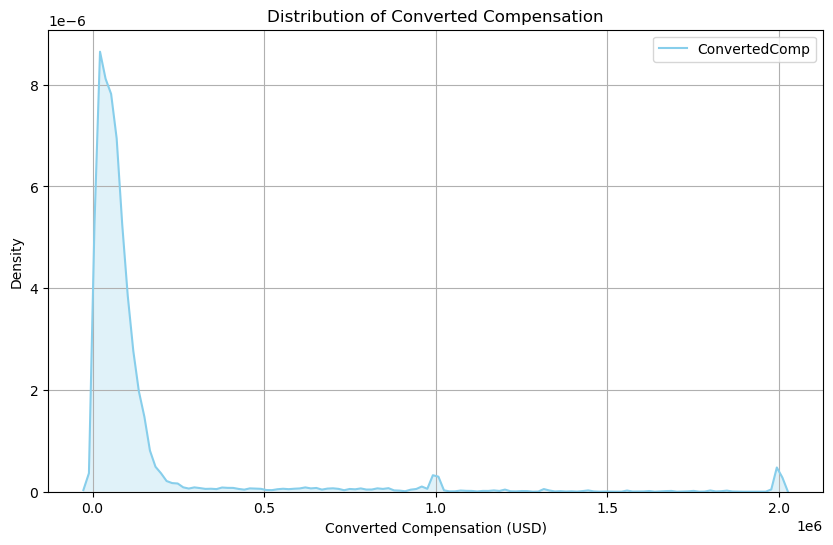

In [35]:
import seaborn as sns

# Remove any NaN values from the column
converted_comp = df['ConvertedComp'].dropna()

# Plot the distribution curve
plt.figure(figsize=(10, 6))
sns.kdeplot(converted_comp, color='skyblue', shade=True)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


Plot the histogram for the column `ConvertedComp`.


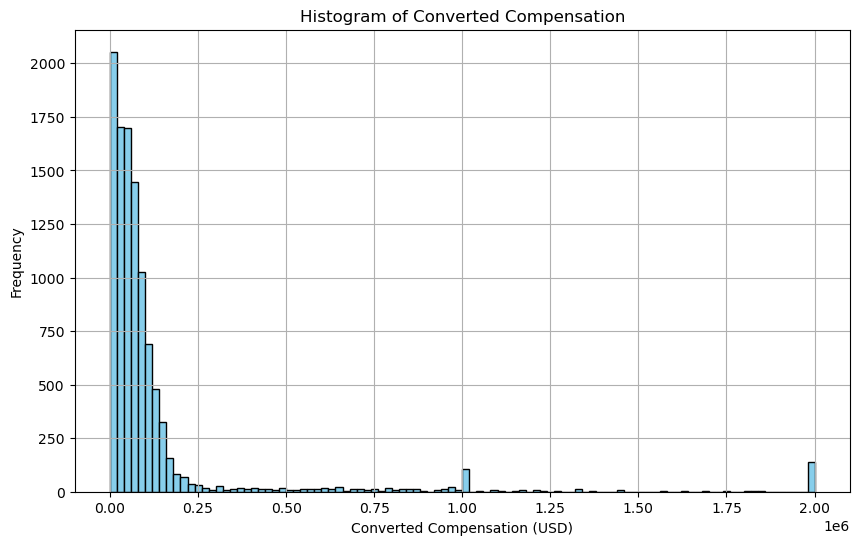

In [63]:
import matplotlib.pyplot as plt

# Remove any NaN values from the column
converted_comp = df['ConvertedComp'].dropna()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(converted_comp, bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



What is the median of the column `ConvertedComp`?


In [40]:
median_converted_comp = df['ConvertedComp'].median()
print("Median of ConvertedComp column:", median_converted_comp)


Median of ConvertedComp column: 57745.0


How many responders identified themselves only as a **Man**?


In [41]:
# Filter the DataFrame for respondents who identified themselves as a Man
male_responders = df[df['Gender'] == 'Man']

# Count the number of rows in the filtered DataFrame
num_male_responders = len(male_responders)

print("Number of responders identified only as a Man:", num_male_responders)


Number of responders identified only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [42]:
# Filter the DataFrame for responders who identified themselves as a Woman
female_responders = df[df['Gender'] == 'Woman']

# Calculate the median of ConvertedComp for the filtered data
median_converted_comp_female = female_responders['ConvertedComp'].median()

print("Median ConvertedComp of responders identified only as a Woman:", median_converted_comp_female)



Median ConvertedComp of responders identified only as a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [43]:
# Compute the five-number summary for the Age column
min_age = df['Age'].min()
q1_age = df['Age'].quantile(0.25)
median_age = df['Age'].median()
q3_age = df['Age'].quantile(0.75)
max_age = df['Age'].max()

# Print the five-number summary
print("Minimum Age:", min_age)
print("First Quartile (Q1):", q1_age)
print("Median Age (Second Quartile, Q2):", median_age)
print("Third Quartile (Q3):", q3_age)
print("Maximum Age:", max_age)

Minimum Age: 16.0
First Quartile (Q1): 25.0
Median Age (Second Quartile, Q2): 29.0
Third Quartile (Q3): 35.0
Maximum Age: 99.0


Plot a histogram of the column `Age`.


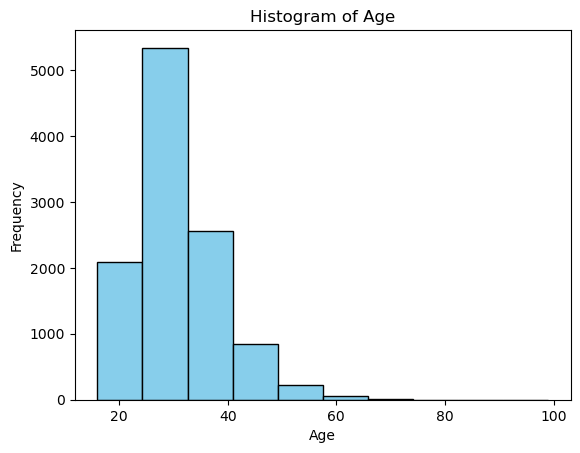

In [44]:
import matplotlib.pyplot as plt

# Plot histogram of the Age column
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show plot
plt.show()



## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


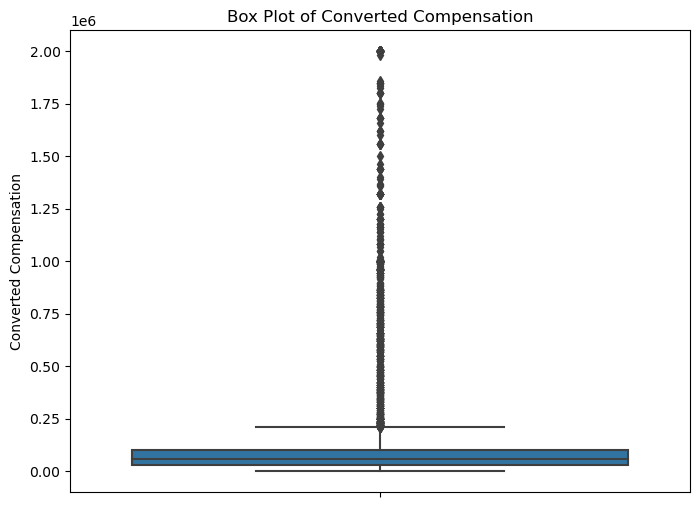

In [48]:
import seaborn as sns

# Plot box plot of the ConvertedComp column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ConvertedComp'])

# Add labels and title
plt.ylabel('Converted Compensation')
plt.title('Box Plot of Converted Compensation')

# Show plot
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [49]:
import numpy as np

# Calculate quartiles
Q1 = np.percentile(df['ConvertedComp'].dropna(), 25)
Q3 = np.percentile(df['ConvertedComp'].dropna(), 75)

# Calculate interquartile range
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)



Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [50]:
# Calculate upper and lower bounds
UB = Q3 + 1.5 * IQR
LB = Q1 - 1.5 * IQR

print("Upper Bound (UB):", UB)
print("Lower Bound (LB):", LB)



Upper Bound (UB): 209698.0
Lower Bound (LB): -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [51]:
# Calculate upper and lower bounds
UB = Q3 + 1.5 * IQR
LB = Q1 - 1.5 * IQR

# Count outliers
outliers = df[(df['ConvertedComp'] < LB) | (df['ConvertedComp'] > UB)]
num_outliers = outliers.shape[0]

print("Number of outliers in ConvertedComp column:", num_outliers)

Number of outliers in ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [56]:
# Remove outliers
df_filtered = df[(df['ConvertedComp'] >= LB) & (df['ConvertedComp'] <= UB)]

# Display the filtered DataFrame
print("Filtered DataFrame after removing outliers:")
print(df_filtered)


Filtered DataFrame after removing outliers:
       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month b

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [57]:
# Calculate correlation between Age and all other numerical columns
age_corr = df.corr()['Age'].sort_values(ascending=False)

# Display the correlation values
print("Correlation between Age and other numerical columns:")
print(age_corr)


Correlation between Age and other numerical columns:
Age              1.000000
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CompTotal        0.006970
Respondent       0.004041
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
